In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
# Own implementations
%load_ext autoreload
%autoreload 2
from data_generation import *

# Misc
import sys
sys.path.insert(0, '../misc')
from plots import *

plt.style.use('../misc/report.mplstyle')
save_dir = "../../../tex/01_regression_resampling/img/"

In [7]:
save=True

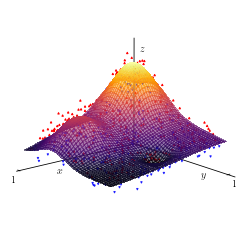

In [8]:
N_uniform = 100
x = np.linspace(0,1,N_uniform)
y = np.linspace(0,1,N_uniform)
X,Y = np.meshgrid(x,y)

# Data parameters
N = 600
sigma = 0.1
x,y,z = random_x_y_franke(N, sigma=sigma)

kwargs = {"lw":2, 
          "cmap":sns.color_palette("inferno", as_cmap=True), 
          "antialiased":False,
          "alpha":0.6,
          "linewidth":0,
          "zorder":1
         }
fig = plt.figure(figsize=(4.48,4.48))
ax = fig.add_subplot(projection='3d')
fXY = franke_function(X,Y)
ax.plot_surface(X, Y, fXY, **kwargs)

lower = z<franke_function(x,y)
higher = z>franke_function(x,y)
ax.scatter(x[lower],y[lower],z[lower],zorder=20,alpha=0.8,s=2,color="blue",marker="v")
ax.scatter(x[higher],y[higher],z[higher],zorder=20,alpha=1,s=2,color="red",marker="^")

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel(r"$x$",linespacing=400) 
ax.set_ylabel(r"$y$") 
ax.text(-0.1,-0.1,1.2,r"$z$")
#ax.set_zlabel("z")

tmp_planes = ax.xaxis._PLANES 
ax.xaxis._PLANES = ( tmp_planes[0], tmp_planes[0], 
                     tmp_planes[1], tmp_planes[0], 
                     tmp_planes[0], tmp_planes[0])

tmp_planes = ax.yaxis._PLANES 
ax.yaxis._PLANES = ( tmp_planes[1], tmp_planes[0], 
                     tmp_planes[0], tmp_planes[0], 
                     tmp_planes[0], tmp_planes[0])

tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[1], tmp_planes[0], 
                     tmp_planes[0], tmp_planes[0], 
                     tmp_planes[0], tmp_planes[0])

ax.view_init(15,50)

ax.grid(False)
ax.xaxis.set_major_locator(ticker.FixedLocator([1]))
ax.yaxis.set_major_locator(ticker.FixedLocator([1]))
ax.zaxis.set_major_locator(ticker.FixedLocator([1]))

ax.axes.xaxis.set_ticklabels([1])
ax.axes.yaxis.set_ticklabels([1])
ax.axes.zaxis.set_ticklabels([1])

ax.tick_params(axis='x', which='major', pad=0)
ax.tick_params(axis='y', which='major', pad=0)
# forming the cartesian product of x and y coordinates
#xy = np.array([X,Y]).T.reshape(-1,2)
#X_uniform = generate_design_matrix(xy[:,0], xy[:,1], p)
#fit = ols.predict(X_uniform)
#fit = fit.reshape(N_uniform,N_uniform).T

if save:
    fig.savefig(save_dir + "franke.pdf",bbox_inches="tight",pad_inches = 0.01)
else:
    plt.show()